# Tutorial de NumPy Voy en: 2.6.1 Indexing with Arrays of Indices

**NumPy** es una biblioteca de Python que da soporte para vectores y matrices. Dichas funciones generalmente están implementadas en lenguaje C y FORTRAN, por lo que son muy eficientes con el uso de la memoria y veloces. De hecho NumPy llama a librerías especializadas como LAPACK.

NumPy es prácticamente la librería estándar para el manejo de vectores y matrices con Python y el bloque principal en el cual están basadas el resto de librerías de cálculo científico (matplotlib, SciPy, pandas, scikit-learn, scikit-image, etc).

Creada en 2005 por Travis Oliphant, el CEO y fundador de Continuum Analytics (los que producen Anaconda).

Su webpage es: http://www.numpy.org/

La documentación de esta librería es:
* User guide: https://docs.scipy.org/doc/numpy/numpy-user-1.16.1.pdf (versión 1.16.1 -- 148 páginas)
* Reference guide: https://docs.scipy.org/doc/numpy/numpy-ref-1.16.1.pdf (versión 1.16.1 -- 1372 páginas)

La versión web de la documentación se encuentra en: https://docs.scipy.org/doc/

Para aquellos ya familiarizados con MATLAB se recomienda mirar: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

# Bibliografía recomendada:

* Scientific computing tools with python: https://www.scipy.org/
* Scipy lectures:  http://www.scipy-lectures.org/
* The NumPy quickstart: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* The SciPy tutorial: https://docs.scipy.org/doc/scipy/reference/tutorial/


# Tema a evaluar:
Sección 1.3 del Scipy Lectures (2017) -> NumPy

## Cargando NumPy

In [6]:
import numpy as np
print('La versión de NumPy que estamos utilizando es la', np.__version__)

La versión de NumPy que estamos utilizando es la 1.15.4


## Buscando un comando

In [109]:
np.lookfor('xor')

Search results for 'xor'
------------------------
numpy.bitwise_xor
    Compute the bit-wise XOR of two arrays element-wise.
numpy.logical_xor
    Compute the truth value of x1 XOR x2, element-wise.
numpy.ma.setxor1d
    Set exclusive-or of 1-D arrays with unique elements.
numpy.ma.bitwise_xor
    Compute the bit-wise XOR of two arrays element-wise.
numpy.ma.logical_xor
    Compute the truth value of x1 XOR x2, element-wise.
numpy.setxor1d
    Find the set exclusive-or of two arrays.
numpy.bitwise_or
    Compute the bit-wise OR of two arrays element-wise.
numpy.logical_or
    Compute the truth value of x1 OR x2 element-wise.
numpy.bitwise_and
    Compute the bit-wise AND of two arrays element-wise.
numpy.bitwise_not
    Compute bit-wise inversion, or bit-wise NOT, element-wise.
numpy.logical_and
    Compute the truth value of x1 AND x2 element-wise.
numpy.logical_not
    Compute the truth value of NOT x element-wise.
numpy.ma.bitwise_or
    Compute the bit-wise OR of two arrays element

## Creando arrays unidimensionales

In [110]:
# creando arrays
x1 = np.array([1, 2, 3])

In [111]:
x1

array([1, 2, 3])

In [112]:
type(x1)

numpy.ndarray

El tipo ```numpy.ndarray``` es el tipo de dato básico de NumPy. Es básicamente una colección *n* dimensional de elementos del mismo tipo. Se caracterizan porque tienen un tamaño fijo y un solo tipo de datos asociado. De hecho, cambiar el tamaño del ```ndarray``` crearía un nuevo array y borraría el original, por lo que no es una operación recomendada. Las listas de Python, no tienen un tamaño fijo ni un solo tipo de datos asociado.

Tenga en cuenta que ```numpy.ndarray``` es una clase que contiene muchos métodos y atributos.

## Atributos de los arrays

RECUERDE: presionar ```Shift+Tab``` después de escribir un comando muestra un help tool tip relativo al mismo

In [1]:
def atributos_del_array(a):
    print('El array es:', a)
    for atrib in ('ndim',     # número de dimensiones
                  'size',     # espacio que ocupa en memoria
                  'itemsize', # espacio que ocupa cada elemenot en memoria
                  'dtype',    # tipo de elemento base del array. dtype = data type
                  'shape',    # tamaño en cada dimension
                  'strides',
                  'data',     # dirección de memoria
                  'flags'):
        print('{:9s}: {}'.format(atrib, getattr(a, atrib)))

In [114]:
atributos_del_array(x1)

El array es: [1 2 3]
ndim     : 1
size     : 3
itemsize : 8
dtype    : int64
shape    : (3,)
strides  : (8,)


In [2]:
x1.dtype # data type

NameError: name 'x1' is not defined

In [116]:
x1.dtype.name

'int64'

## Tipos básicos de un array

Se pueden crear arrays de solo floats, complex numbers, booleans, cadenas. El tipo del array se deduce del tipo de elementos de la secuencia ingresada.

In [117]:
x1 = np.array([1, 2, 3])
x2 = np.array([1, 2, 3.0])
x3 = np.array([1-1j, 2, 3.0+3j])
x4 = np.array([False, False, True])
x5 = np.array(['Manizales', 'Pereira', 'Armenia'])

# Observe que por defecto numpy seleccionará el tipo de dato adecuado para almacenar todos los elementos
x6 = np.array([1, 2.0, 'Hola'])

# Observe que x6 es un array de UNICODE strings de máximo 32 caracteres
print('Atributos del array x6:')
atributos_del_array(x6)

print('\nAtributos del array x7:')
x7 = np.array([None, None])
atributos_del_array(x7)

Atributos del array x6:
El array es: ['1' '2.0' 'Hola']
ndim     : 1
size     : 3
itemsize : 128
dtype    : <U32
shape    : (3,)
strides  : (128,)

Atributos del array x7:
El array es: [None None]
ndim     : 1
size     : 2
itemsize : 8
dtype    : object
shape    : (2,)
strides  : (8,)


Se debe tener en cuenta que con los nuevos tipos de datos, pueden suceder cosas indeseables como por ejemplo el **overflow**:

In [118]:
np.arange(0,200,10, dtype=np.int8)

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120, -126, -116, -106,  -96,  -86,  -76,  -66], dtype=int8)

## Algunos tipos de datos

**enteros**:  ```int8, int16, int32, int64, uint8, uint16```, etc.

**float**:    ```float16, float32, float64```, etc.

**complex**:  ```complex128```

**boolean**:  ```bool8```

**Unicode string**

El tipo de dato del array se puede especificar justo cuando se crea:

In [119]:
np.array([1,2, 3,4], dtype=complex)

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j])

## Operaciones con arrays

Una de las ventajas más interesantes de NumPy es que permite el uso de la vectorización de los cálculos. La vectorización describe la ausencia de ciclos, indexación, etc. en el código, lo cual hace que el código no solo sea más conciso y fácil de leer, sino que sea más veloz.

In [120]:
a = np.array([1,2,3,4])
b = np.array((5,6,7,0))

a + b

array([ 6,  8, 10,  4])

In [121]:
# Observe que la multiplicación es elemento a elemento
a * b

array([ 5, 12, 21,  0])

In [122]:
# Observe que la potenciación es elemento a elemento
a ** b

array([   1,   64, 2187,    1])

In [123]:
# Observe que la división es elemento a elemento. Mire la división por cero.
# Recuerde que 1/0 genera una excepción "ZeroDivisionError". Aquí NumPy genera un Warning
a / b

array([0.2       , 0.33333333, 0.42857143,        inf])

In [124]:
_

array([0.2       , 0.33333333, 0.42857143,        inf])

También se pueden utilizar los operadores:
```+ - * / % ** // > <```, etc

In [125]:
b < 6

array([ True, False, False,  True])

In [126]:
# Las constantes de la librería "math" e y pi también están definidas
print(np.e)
print(np.pi)

2.718281828459045
3.141592653589793


In [4]:
x1 = np.arange(6)
atributos_del_array(x1)

NameError: name 'np' is not defined

In [128]:
x2 = np.arange(6.0)
atributos_del_array(x2)

El array es: [0. 1. 2. 3. 4. 5.]
ndim     : 1
size     : 6
itemsize : 8
dtype    : float64
shape    : (6,)
strides  : (8,)


In [129]:
# Multiplicando un array por un escalar (resultado int)
10 * x1

array([ 0, 10, 20, 30, 40, 50])

In [130]:
# Multiplicando un array por un escalar (resultado float)
10 * x2

array([ 0., 10., 20., 30., 40., 50.])

In [131]:
# Se puede utilizar también *=, /=, etc.
x1 += 10
atributos_del_array(x1)

El array es: [10 11 12 13 14 15]
ndim     : 1
size     : 6
itemsize : 8
dtype    : int64
shape    : (6,)
strides  : (8,)


In [132]:
# pasando un array a través de una función
y2 = 2*np.sin(x2)
y2

array([ 0.        ,  1.68294197,  1.81859485,  0.28224002, -1.51360499,
       -1.91784855])

In [133]:
type(y2)

numpy.ndarray

In [134]:
atributos_del_array(y2)

El array es: [ 0.          1.68294197  1.81859485  0.28224002 -1.51360499 -1.91784855]
ndim     : 1
size     : 6
itemsize : 8
dtype    : float64
shape    : (6,)
strides  : (8,)


## Arrays en varias dimensiones
NumPy soporta hasta 32 dimensiones

In [135]:
# se crea un vector y una matriz
vec = np.array([10, 12, 14, -10])
mat = np.array([[10, 12, 14, -10],
                [ 3,  0, -2,   8]], dtype=complex)

print(vec)
mat


[ 10  12  14 -10]


array([[ 10.+0.j,  12.+0.j,  14.+0.j, -10.+0.j],
       [  3.+0.j,   0.+0.j,  -2.+0.j,   8.+0.j]])

In [136]:
# tamaño de un array (se devuelve una tupla)
vec.shape    # equivalente a np.shape(vec)

(4,)

In [137]:
mat.shape    # equivalente a np.shape(mat)

(2, 4)

In [138]:
len(mat) # siempre da la longitud de la dimensión más grande

2

In [139]:
# número de elementos de un array
vec.size  # equivalente a np.size(vec)

4

In [140]:
mat.size  # equivalente a np.size(mat)

8

In [141]:
# número de dimensiones de un array
vec.ndim

1

In [142]:
mat.ndim

2

In [143]:
# espacio usado en memoria
vec.nbytes

32

In [144]:
mat.nbytes

128

En resumen:

| Atributo   | Descripción                                      |
|------------|--------------------------------------------------|
| a.data     | Buffer to raw data                               |
| a.dtype    | Tipo de dato                                     |
| a.ndim     | Número de dimensiones                            |
| a.shape    | Tupla que representa el tamaño en cada dirección |
| a.size     | Número total de elementos                        |
| a.itemsize | Espacio que ocupa cada elemento en memoria       |
| a.nbytes   | Número total de bytes que requiere el array      |


## Strides
Los arrays son una colección de elementos del mismo tipo almacenados consecutivamente en memoria. Se guardan fila a fila.

In [145]:
x1 = np.arange(6)
x2 = np.arange(6).reshape(2,3)
x3 = np.arange(6).reshape(3,2)

print(x1.strides, x2.strides, x3.strides)

(8,) (24, 8) (16, 8)


Aquí (24,8) dice que una fila de ```x2``` mide 24 bytes y que una fila de ```x3``` mide 16 bytes y que cada elemento ocupa 8 bytes.

In [146]:
x4 = np.arange(120).reshape(5,4,3,2)
x4.strides

(192, 48, 16, 8)

```2 x 3 x 4 x 8 = 192```

```2 x 3 x 8 = 48```

```2 x 8 = 16```

## Multiplicación de matrices y vectores

In [147]:
a = np.random.randint(30, size=(4,5)); print('a = ', a)
b = np.random.randint(30, size=(5,1)); print('b = \n', b)

a =  [[ 6  0 25 18 28]
 [ 2 12 17  4 25]
 [14 25 22 22  2]
 [ 4 17 14  5 12]]
b = 
 [[21]
 [ 5]
 [21]
 [ 8]
 [22]]


In [148]:
a.dot(b)

array([[1411],
       [1041],
       [1101],
       [ 767]])

In [149]:
a @ b # Este comando funciona a partir de Python 3.5

array([[1411],
       [1041],
       [1101],
       [ 767]])

Algunas operaciones como el ```+=```, ```-=```, ```*=```, etc se pueden utilizar:

In [150]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))

In [151]:
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [152]:
b += a
b

array([[3.86160962, 3.9058072 , 3.76858325],
       [3.26123164, 3.9384556 , 3.93864246]])

In [153]:
# Este comando falla ya que b no se está convirtiendo a un int
a += b

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

## Creando e inicializando matrices a partir de funciones

In [154]:
def mifun(i, j):
    return (i+1)*(j+2)

# ahora creamos una matriz A donde A[i,j]=mifun(i,j)
A = np.fromfunction(mifun, (3,6))
A

array([[ 2.,  3.,  4.,  5.,  6.,  7.],
       [ 4.,  6.,  8., 10., 12., 14.],
       [ 6.,  9., 12., 15., 18., 21.]])

## De un array a una lista

In [155]:
A_lista = A.tolist()
A_lista

[[2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
 [4.0, 6.0, 8.0, 10.0, 12.0, 14.0],
 [6.0, 9.0, 12.0, 15.0, 18.0, 21.0]]

## Array indexing
Siempre saca un elemento del array

In [156]:
# vuelvo a escribir el vector y la matriz
vec = np.array([10, 12, 14, -10])
mat = np.array([[10, 12, 14, -10],[3, 0, -2, 8]])
mat

array([[ 10,  12,  14, -10],
       [  3,   0,  -2,   8]])

In [157]:
vec[0]

10

In [158]:
mat[0,2]  # es equivalente a la versión más lenta "mat[0][2]"

14

In [159]:
vec[-1] = -3000

In [160]:
vec

array([   10,    12,    14, -3000])

In [161]:
# rellena el array "vec" de 5
vec.fill(5)

In [162]:
vec

array([5, 5, 5, 5])

In [163]:
# también se puede hacer, pero es más lento 
# (MENTIRAS! lo comprobaremos a continuación!)
vec[:] = 3

In [164]:
vec = np.zeros(1000000)

In [165]:
%%timeit
vec.fill(5)

447 µs ± 70.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [166]:
%%timeit
vec[:] = 10

482 µs ± 42.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [167]:
vec = np.array([10, 12, 14, -10])
vec

array([ 10,  12,  14, -10])

In [168]:
vec.dtype

dtype('int64')

In [169]:
# observe que al ser este un array de enteros int64, no acepta números
# flotantes
vec[1] = 8.723 
vec[2] = -8.723 

In [170]:
vec

array([ 10,   8,  -8, -10])

## Cuidado con asignar tipos de datos diferentes (truncamiento)

In [11]:
x1 = np.array([1,2,3])
x1[1] = 123.123
x1

array([  1, 123,   3])

## Array slicing
Siempre saca una array del array. El límite inferior se incluye; el límite superior se excluye: [lower, upper). Dicho array es una vista al array inicial, y por lo tanto se debe tratar como una referencia, no como una copia.

In [171]:
vec = np.arange(10,30)
vec

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

In [172]:
vec[1:3]

array([11, 12])

In [173]:
vec[1:-2]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [174]:
vec[-8:6]

array([], dtype=int64)

In [175]:
# los tres primeros elementos
vec[:3]

array([10, 11, 12])

In [176]:
vec[3:]

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [177]:
vec[::2]

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [178]:
# la lista "al revés"
vec[::-1]

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10])

In [179]:
vec[:6:2] = -1000 # equivalente a vec[0:6:2] = -1000; 
vec

array([-1000,    11, -1000,    13, -1000,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29])

## Cambiando las dimensiones de un array
Crea algo así como una vista, no se hace una copia

In [180]:
mat = np.arange(20)
mat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [181]:
mat.reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Si se coloca el -1 como argumento a ```.reshape()```, la otra dimensión se calcula automáticamente

In [182]:
mat.reshape(4,-1)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [183]:
mat.reshape(-1,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [184]:
mat = np.arange(20)
print(mat.shape)
mat.shape = (4,5)  # alternativa a .reshape()
print(mat.shape)
mat

(20,)
(4, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [185]:
mat.shape

(4, 5)

In [186]:
mat.size

20

In [187]:
mat.ndim

2

## Matrix indexing and slicing

In [188]:
mat[1,3]  # retorna un elemento

8

In [189]:
mat[1,3] = -100
mat

array([[   0,    1,    2,    3,    4],
       [   5,    6,    7, -100,    9],
       [  10,   11,   12,   13,   14],
       [  15,   16,   17,   18,   19]])

In [190]:
mat[1,3:] # retorna un array unidimensional

array([-100,    9])

In [191]:
mat[1:,2:] # retorna un array bidimensional

array([[   7, -100,    9],
       [  12,   13,   14],
       [  17,   18,   19]])

## Iterando sobre arrays
Esta operación siempre se lleva a cabo sobre la primera dimensión, por lo que en el caso de matrices, será sobre las filas:

In [192]:
b = np.fromfunction(lambda x,y:10*x+y, (5,4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [193]:
for fila in b:
    print(fila)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


Observe que los elementos de un array se guardan de la misma forma que en lenguaje C: fila por fila:

In [194]:
for elemento in b.flat:
    print(elemento)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## Array slicing

Funciona similar al slicing de listas en python. Siempre saca una array del array. El límite inferior se incluye; el límite superior se excluye: [lower, upper). Dicho array es una vista al array inicial, y por lo tanto se debe tratar como una referencia, no como una copia.

In [195]:
print(mat)

[[   0    1    2    3    4]
 [   5    6    7 -100    9]
 [  10   11   12   13   14]
 [  15   16   17   18   19]]


In [196]:
# saca la segunda fila. Equivalente a mat[1,:]
mat[1]

array([   5,    6,    7, -100,    9])

In [197]:
mat[1,:]

array([   5,    6,    7, -100,    9])

In [198]:
# saca la segunda columna
mat[:,1]

array([ 1,  6, 11, 16])

In [199]:
# saca las columnas 3 y 1
mat[:,[3, 1]]

array([[   3,    1],
       [-100,    6],
       [  13,   11],
       [  18,   16]])

In [200]:
# saca las columnas 1,2,3
mat[:,1:4]

array([[   1,    2,    3],
       [   6,    7, -100],
       [  11,   12,   13],
       [  16,   17,   18]])

In [201]:
# fila 2, saca las columnas 1,2,3
mat[2,1:4]

array([11, 12, 13])

In [202]:
mat[2:,2:]

array([[12, 13, 14],
       [17, 18, 19]])

In [203]:
mat[[1,3],1:4]

array([[   6,    7, -100],
       [  16,   17,   18]])

# ¡Cuidado con las vistas y las copias!
Tenga en cuenta que **los slices se comportan como referencias**

Esto tiene sus ventajas y sus desventajas:

**VENTAJAS**
* Es computacionalmente más eficiente porque no hay que crear copias
* Es ventajoso renombrar una sección de una gran matriz para mejorar la manupulación de dicha matriz

**DESVENTAJAS**
* Si no se tiene cuidado, puede acarrear resultados inesperados
* Se tiene que utilizar ```.copy()``` para recrear una copia

In [204]:
mat2 = mat  # el operador asignación crea vistas
print(mat)
mat is mat2

[[   0    1    2    3    4]
 [   5    6    7 -100    9]
 [  10   11   12   13   14]
 [  15   16   17   18   19]]


True

In [205]:
# observe que también se pueden asignar listas de python
mat2[1:3,2] = [500, -999]

In [206]:
mat #cuando mat2 cambia, mat también cambia!

array([[   0,    1,    2,    3,    4],
       [   5,    6,  500, -100,    9],
       [  10,   11, -999,   13,   14],
       [  15,   16,   17,   18,   19]])

In [207]:
# A veces toca hacer un .copy() para evitar las referencias
# El operador [:] (por ejemplo mat[:]) no funciona como copia en NumPy
mat3 = mat[1:3,2].copy()
print(mat3)
mat is mat3

[ 500 -999]


False

In [208]:
mat3 = [0, 0]
mat3

[0, 0]

In [209]:
mat

array([[   0,    1,    2,    3,    4],
       [   5,    6,  500, -100,    9],
       [  10,   11, -999,   13,   14],
       [  15,   16,   17,   18,   19]])

# Fancy indexing
Comparado con el slicing, el fancy indexing crea copias, no vistas sobre los arrays originales.

## Indexación de arrays con otros arrays

In [210]:
vec = np.arange(0, 80, 10) # observe que no incluye el 80. El arange
vec

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [211]:
idx = [1, 2, -1]

In [212]:
vec

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [213]:
vec[idx]

array([10, 20, 70])

## Indexación lógica con arrays

In [214]:
mask1 = np.array([0, 1, 1, 0, 1, 0, 0, 1], dtype=bool)

In [215]:
mask2 = vec < 30

In [216]:
vec[mask1]

array([10, 20, 40, 70])

In [217]:
vec[mask2]

array([ 0, 10, 20])

In [218]:
vec2 = vec

In [219]:
vec2[mask2] = [-1, -2, -3]

In [220]:
vec

array([-1, -2, -3, 30, 40, 50, 60, 70])

In [221]:
a = np.arange(36).reshape(6,6)

In [222]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [223]:
a[(0,1,2,3,4,5),(0,1,2,3,4,5)] = [-1, -2, -3, -4, -5, -6]

In [224]:
a


array([[-1,  1,  2,  3,  4,  5],
       [ 6, -2,  8,  9, 10, 11],
       [12, 13, -3, 15, 16, 17],
       [18, 19, 20, -4, 22, 23],
       [24, 25, 26, 27, -5, 29],
       [30, 31, 32, 33, 34, -6]])

In [225]:
a[3:,[0, 2, 4]]

array([[18, 20, 22],
       [24, 26, -5],
       [30, 32, 34]])

In [226]:
a > 20

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False,  True,  True],
       [ True,  True,  True,  True, False,  True],
       [ True,  True,  True,  True,  True, False]])

In [227]:
a[a > 20] = 1

In [228]:
a

array([[-1,  1,  2,  3,  4,  5],
       [ 6, -2,  8,  9, 10, 11],
       [12, 13, -3, 15, 16, 17],
       [18, 19, 20, -4,  1,  1],
       [ 1,  1,  1,  1, -5,  1],
       [ 1,  1,  1,  1,  1, -6]])

In [229]:
a = np.arange(40).reshape(5,8)

In [230]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [231]:
b = a
mask1 = np.array([0, 1, 1, 0, 1, 0, 0, 1], dtype=bool)

In [232]:
c = a[3,mask1] = [-1, -1, -1, -1]

In [233]:
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, -1, -1, 27, -1, 29, 30, -1],
       [32, 33, 34, 35, 36, 37, 38, 39]])

En este caso, el slicing, el indexado mediante vectores y el indexado lógico simplemente crea una copia en vez de una vista en el array original


In [234]:
c

[-1, -1, -1, -1]

In [235]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, -1, -1, 27, -1, 29, 30, -1],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [236]:
a == -1

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False,  True,  True, False,  True, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [237]:
# El comando where es similar al comando find() de MATLAB
idx = np.where(a >= 29) # observe que se retorna una tupla
idx

(array([3, 3, 4, 4, 4, 4, 4, 4, 4, 4]), array([5, 6, 0, 1, 2, 3, 4, 5, 6, 7]))

In [238]:
a[idx]

array([29, 30, 32, 33, 34, 35, 36, 37, 38, 39])

In [239]:
a[a%3 == 0] = 0
a

array([[ 0,  1,  2,  0,  4,  5,  0,  7],
       [ 8,  0, 10, 11,  0, 13, 14,  0],
       [16, 17,  0, 19, 20,  0, 22, 23],
       [ 0, -1, -1,  0, -1, 29,  0, -1],
       [32,  0, 34, 35,  0, 37, 38,  0]])

## Como comparar dos arrays


In [240]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
a == b

array([ True,  True,  True])

In [241]:
np.all(a == b) # si los arrays son de enteros

True

In [242]:
a = np.array([0.1, 0.2, 0.3])
b = np.array([0.1, 0.3-0.1, 0.3])
a == b # puede fallar con arrays de floats

array([ True, False,  True])

In [243]:
np.isclose(a,b) # esta es la forma correcta de comparar

array([ True,  True,  True])

In [244]:
np.allclose(a,b) # esta es la forma correcta de comparar

True

In [245]:
# Lastimosamente, no se puede utilizar el encadenamiento de 
# comparaciones con numpy
1 < 2 < 3

True

In [246]:
np.array([1,1,1]) < np.array([2,2,2])

array([ True,  True,  True])

## Aplanando un array (flatten vs ravel)
Esto es similar a vector(:) de MATLAB

* ```flatten``` always returns a copy.

* ```ravel``` returns a view of the original array **whenever possible**.

```ravel``` will often be faster since no memory is copied, but you have to be more careful about modifying the array it returns.

In [247]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

```.flatten()``` y ```.ravel()```aplanan el array fila por fila, tal y como lo hace el lenguaje C. Si se les coloca el argumento ```'F'```, lo harán columna por columna, tal y como lo hace FORTRAN:

In [248]:
b = a.flatten() # el nuevo array será una copia
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [249]:
a.flatten('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

In [250]:
b[0] =  1000
b

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [251]:
# Observe que cambiar b no altera a
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [252]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Se supone que ```.ravel()``` funciona igual que ```.flatten()```. La diferencia es que .flatten() retorna una copia, y .ravel() retorna una referencia, pero lo que veo aquí es que ambos funcionan como .flatten, haciendo copias.

In [253]:
b = a.ravel() # aquí se copiará una referencia
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [254]:
b[0] = 1000
b

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [255]:
a

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8],
       [   9,   10,   11]])

In [256]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [257]:
b = a

In [258]:
b[0,0] = 1000
b

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8],
       [   9,   10,   11]])

In [259]:
# Observe que cambiar b, altera a
a

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8],
       [   9,   10,   11]])

In [260]:
a is b

True

## Transpuesta
Aquí el ```.T``` retorna la transpuesta
```.T``` es lo mismo que ```.transpose()```

Observe que ```.T``` retorna una referencia, no una copia:

In [261]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [262]:
b = a.T
b

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [263]:
b[1,2] = 1000
b

array([[   0,    3,    6,    9],
       [   1,    4, 1000,   10],
       [   2,    5,    8,   11]])

In [264]:
a

array([[   0,    1,    2],
       [   3,    4,    5],
       [   6, 1000,    8],
       [   9,   10,   11]])

# Agregando dimensiones con newaxis
Crea una referencia, no una copia

In [265]:
a = np.arange(10,20)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [266]:
a.shape

(10,)

In [267]:
b = a[np.newaxis,:]
b

array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [268]:
b.shape

(1, 10)

In [269]:
b[0,0] = 100
b

array([[100,  11,  12,  13,  14,  15,  16,  17,  18,  19]])

In [270]:
a

array([100,  11,  12,  13,  14,  15,  16,  17,  18,  19])

In [271]:
c = a[:,np.newaxis]
c


array([[100],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19]])

In [272]:
c.shape

(10, 1)

In [273]:
d = a[:,np.newaxis,np.newaxis,]
d

array([[[100]],

       [[ 11]],

       [[ 12]],

       [[ 13]],

       [[ 14]],

       [[ 15]],

       [[ 16]],

       [[ 17]],

       [[ 18]],

       [[ 19]]])

In [274]:
d.shape

(10, 1, 1)

In [275]:
a = np.arange(10,20)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [276]:
b = a[:,np.newaxis]
print(b)
print(b.shape)

[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
(10, 1)


In [277]:
a.shape = (10,1)  # así también se pueden agregar dimensiones
print(a)
print(a.shape)

[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
(10, 1)


In [278]:
a.squeeze()  # borra las dimensiones con un longitud = 1

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

# Diagonales

In [279]:
a = np.arange(10,19).reshape(3,3)
a

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [280]:
a.diagonal()

array([10, 14, 18])

In [281]:
a.diagonal(offset=1)

array([11, 15])

In [282]:
a.diagonal(offset=-1)

array([13, 17])

In [283]:
# También funciona con fancy indexing
idx = np.array([0,1])
a[idx,idx]

array([10, 14])

In [284]:
a[idx,idx+1]

array([11, 15])

In [285]:
a[idx+1,idx] = 100
a

array([[ 10,  11,  12],
       [100,  14,  15],
       [ 16, 100,  18]])

## Especificación del tipo de los arrays
La lista de los tipos de datos válidos se encuentra en:
https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

In [286]:
a = np.array([0, 1.0, 2, 3])
a

array([0., 1., 2., 3.])

In [287]:
a.dtype

dtype('float64')

In [288]:
b = np.array([0, 1, 2, 3])
b

array([0, 1, 2, 3])

In [289]:
b.dtype

dtype('int64')

In [290]:
c = np.array([0, 1, 2, 3], dtype=float)
c

array([0., 1., 2., 3.])

In [291]:
c.dtype

dtype('float64')

In [292]:
d = np.array([0, 1, 2, 3], dtype=np.uint8)
d

array([0, 1, 2, 3], dtype=uint8)

In [293]:
d.dtype

dtype('uint8')

In [294]:
f = np.array("abcdefghijáéíóú")
f

array('abcdefghijáéíóú', dtype='<U15')

In [295]:
f.dtype # Cadenas unicode de longitud 15

dtype('<U15')

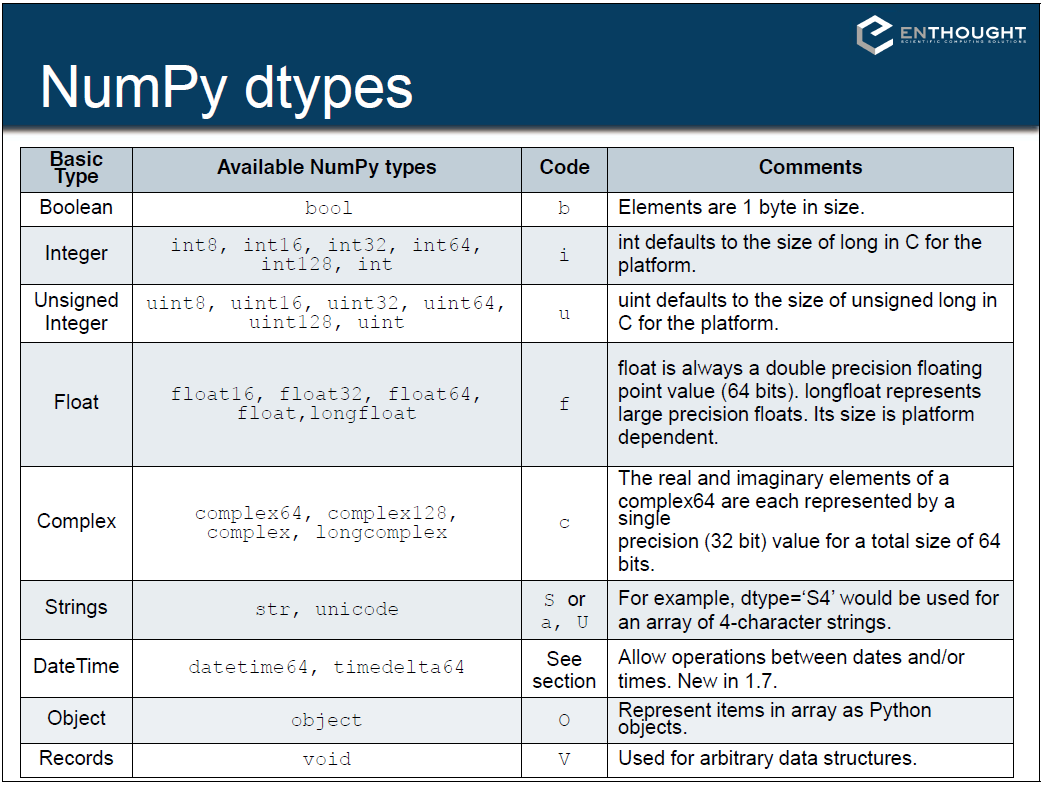

# Type casting

In [296]:
a = np.array([1.5, .3], dtype=np.float32)
a

array([1.5, 0.3], dtype=float32)

In [297]:
# upcast
# asrray() lo que hace es convertir al tipo de dato solicitado, en lo posible evitando hacer copias
np.asarray(a, dtype=np.float64)

array([1.5       , 0.30000001])

In [298]:
# downcast
np.asarray(a, dtype=np.uint8)

array([1, 0], dtype=uint8)

In [299]:
b = np.asarray(a, dtype=np.float64)

In [300]:
b[0] = 2
b

array([2.        , 0.30000001])

In [301]:
# observe que cambiar a b cambia  a a
a

array([1.5, 0.3], dtype=float32)

In [302]:
a = np.array([1.5, .3], dtype=np.float64)
a

array([1.5, 0.3])

In [303]:
a.astype(np.float32)

array([1.5, 0.3], dtype=float32)

In [304]:
a.astype(np.uint8)

array([1, 0], dtype=uint8)

In [305]:
a = np.array([1.5, .3], dtype=np.float64)
b = a.astype(np.float32) # observe que aquí hace una copia del array
b[0] = 100

In [306]:
a

array([1.5, 0.3])

In [307]:
b

array([100. ,   0.3], dtype=float32)

# Cálculos varios con arrays

Reglas:
* Antes de ejecutar las operaciones entre arrays, se deben chequear las dimensiones
* Los operadores matemáticos + - * / exp log, etc... se aplican elemento a elemento
* Las operaciones de reducción (sum, std, kurt, mean, prod) se aplican a todo el array a menos que se especifique un axis
* Los NaN se propagan a menos que se ignoren con nanmean, nansum, nanprod, etc.


## Suma

In [308]:
a = np.random.randint(15,size=(3,5))
a

array([[ 6,  5, 11, 11,  9],
       [ 2,  1,  3, 13, 13],
       [ 8, 11,  3,  8,  7]])

In [309]:
np.sum(a)

111

In [310]:
a.sum()

111

In [311]:
np.sum(a, axis=0)   # equivalente a a.sum(axis=0) -> suma cada columna

array([16, 17, 17, 32, 29])

In [312]:
a.sum(axis=1)       # equivalente a np.sum(a, axis=1) -> suma cada fila

array([42, 32, 37])

In [313]:
a.cumsum(axis=1)   # suma acumulada a lo largo de cada fila

array([[ 6, 11, 22, 33, 42],
       [ 2,  3,  6, 19, 32],
       [ 8, 19, 22, 30, 37]])

## Multiplicación
Funciona con el comando prod() de forma similar al comando sum()

## Minimo y máximo

In [314]:
a

array([[ 6,  5, 11, 11,  9],
       [ 2,  1,  3, 13, 13],
       [ 8, 11,  3,  8,  7]])

In [315]:
a.min()

1

In [316]:
a.min(axis=0) # mínimo de cada columna

array([2, 1, 3, 8, 7])

In [317]:
np.amin(a, axis=0)   # min y amin funcionan igual

array([2, 1, 3, 8, 7])

In [318]:
a.argmin(axis=0)

array([1, 1, 1, 2, 2])

In [319]:
np.max(a, axis=1) # máximo de cada fila

array([11, 13, 11])

In [320]:
np.amax(a, axis=1)

array([11, 13, 11])

In [321]:
np.argmax(a, axis=1)

array([2, 3, 1])

In [322]:
a = np.random.randint(15,size=(3,5))
a

array([[ 3,  8,  0, 10,  5],
       [ 0, 13,  9,  9,  7],
       [11, 10, 10,  4, 13]])

In [323]:
am = np.argmax(a)
am

6

In [324]:
np.unravel_index(am, a.shape)

(1, 1)

## Media y varianza

np.mean(), np.var(), np.cov(), np.std(), np.median()

In [325]:
a

array([[ 3,  8,  0, 10,  5],
       [ 0, 13,  9,  9,  7],
       [11, 10, 10,  4, 13]])

In [326]:
a.mean()

7.466666666666667

In [327]:
a.mean(axis=0)

array([ 4.66666667, 10.33333333,  6.33333333,  7.66666667,  8.33333333])

In [328]:
np.mean(a, axis=1)

array([5.2, 7.6, 9.6])

In [329]:
np.average(a, axis=1)

array([5.2, 7.6, 9.6])

Se puede calcular la desviación estándar y la varianza con np.std() y np.var() respectivamente (o con std() y var()).

## Clip
Limita los valores de un array

In [330]:
a

array([[ 3,  8,  0, 10,  5],
       [ 0, 13,  9,  9,  7],
       [11, 10, 10,  4, 13]])

In [331]:
a.clip(5,10)

array([[ 5,  8,  5, 10,  5],
       [ 5, 10,  9,  9,  7],
       [10, 10, 10,  5, 10]])

## Calcular el rango de máximo a mínimo

In [332]:
a

array([[ 3,  8,  0, 10,  5],
       [ 0, 13,  9,  9,  7],
       [11, 10, 10,  4, 13]])

In [333]:
a.ptp(axis=1)

array([10, 13,  9])

## Redondeando
Recuerde que Python redondea a par (round to even)

In [334]:
lista = [-3.6, -3.5, -3.2, -2.6, -2.5, -2.2, -1.6, -1.5, -1.2, -0.6, -0.5, -0.2, 0, 0.2, 0.5, 0.6, 1.2, 1.5, 1.6, 2.2, 2.5, 2.6, 3.2, 3.5, 3.6]
a = np.array(lista)
a

array([-3.6, -3.5, -3.2, -2.6, -2.5, -2.2, -1.6, -1.5, -1.2, -0.6, -0.5,
       -0.2,  0. ,  0.2,  0.5,  0.6,  1.2,  1.5,  1.6,  2.2,  2.5,  2.6,
        3.2,  3.5,  3.6])

In [335]:
r = a.round()
r

array([-4., -4., -3., -3., -2., -2., -2., -2., -1., -1., -0., -0.,  0.,
        0.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  4.,  4.])

In [336]:
[round(i) for i in lista]

[-4,
 -4,
 -3,
 -3,
 -2,
 -2,
 -2,
 -2,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 4]

In [337]:
np.c_[a, r]

array([[-3.6, -4. ],
       [-3.5, -4. ],
       [-3.2, -3. ],
       [-2.6, -3. ],
       [-2.5, -2. ],
       [-2.2, -2. ],
       [-1.6, -2. ],
       [-1.5, -2. ],
       [-1.2, -1. ],
       [-0.6, -1. ],
       [-0.5, -0. ],
       [-0.2, -0. ],
       [ 0. ,  0. ],
       [ 0.2,  0. ],
       [ 0.5,  0. ],
       [ 0.6,  1. ],
       [ 1.2,  1. ],
       [ 1.5,  2. ],
       [ 1.6,  2. ],
       [ 2.2,  2. ],
       [ 2.5,  2. ],
       [ 2.6,  3. ],
       [ 3.2,  3. ],
       [ 3.5,  4. ],
       [ 3.6,  4. ]])

In [338]:
[np.round(np.pi, decimals=i) for i in range(20)]

[3.0,
 3.1,
 3.14,
 3.142,
 3.1416,
 3.14159,
 3.141593,
 3.1415927,
 3.14159265,
 3.141592654,
 3.1415926536,
 3.14159265359,
 3.14159265359,
 3.1415926535898,
 3.14159265358979,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793]

# Resumen

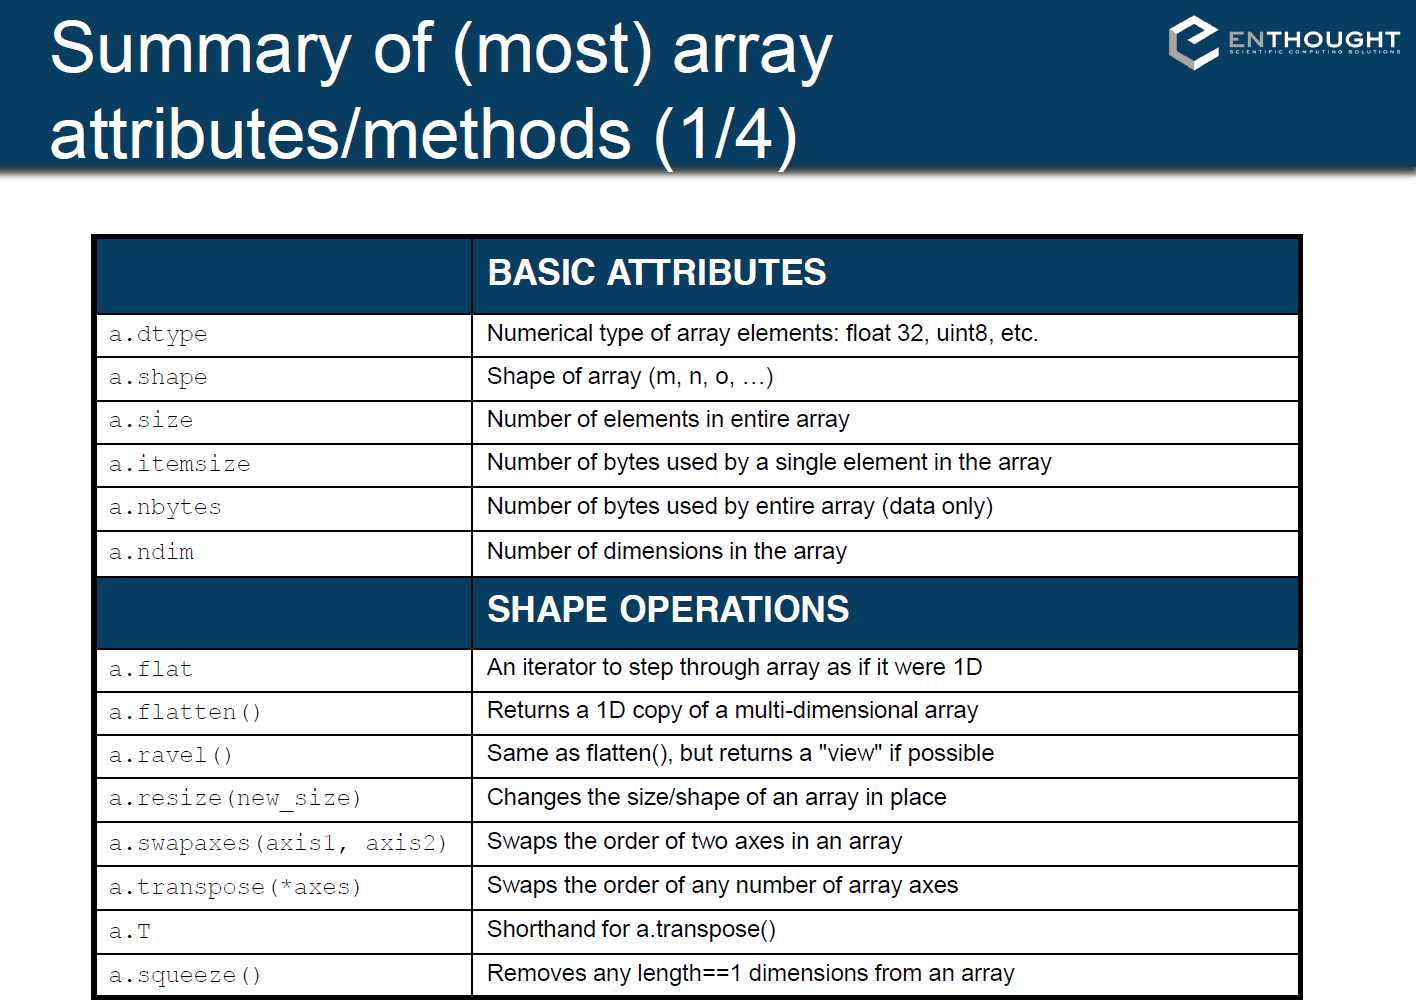

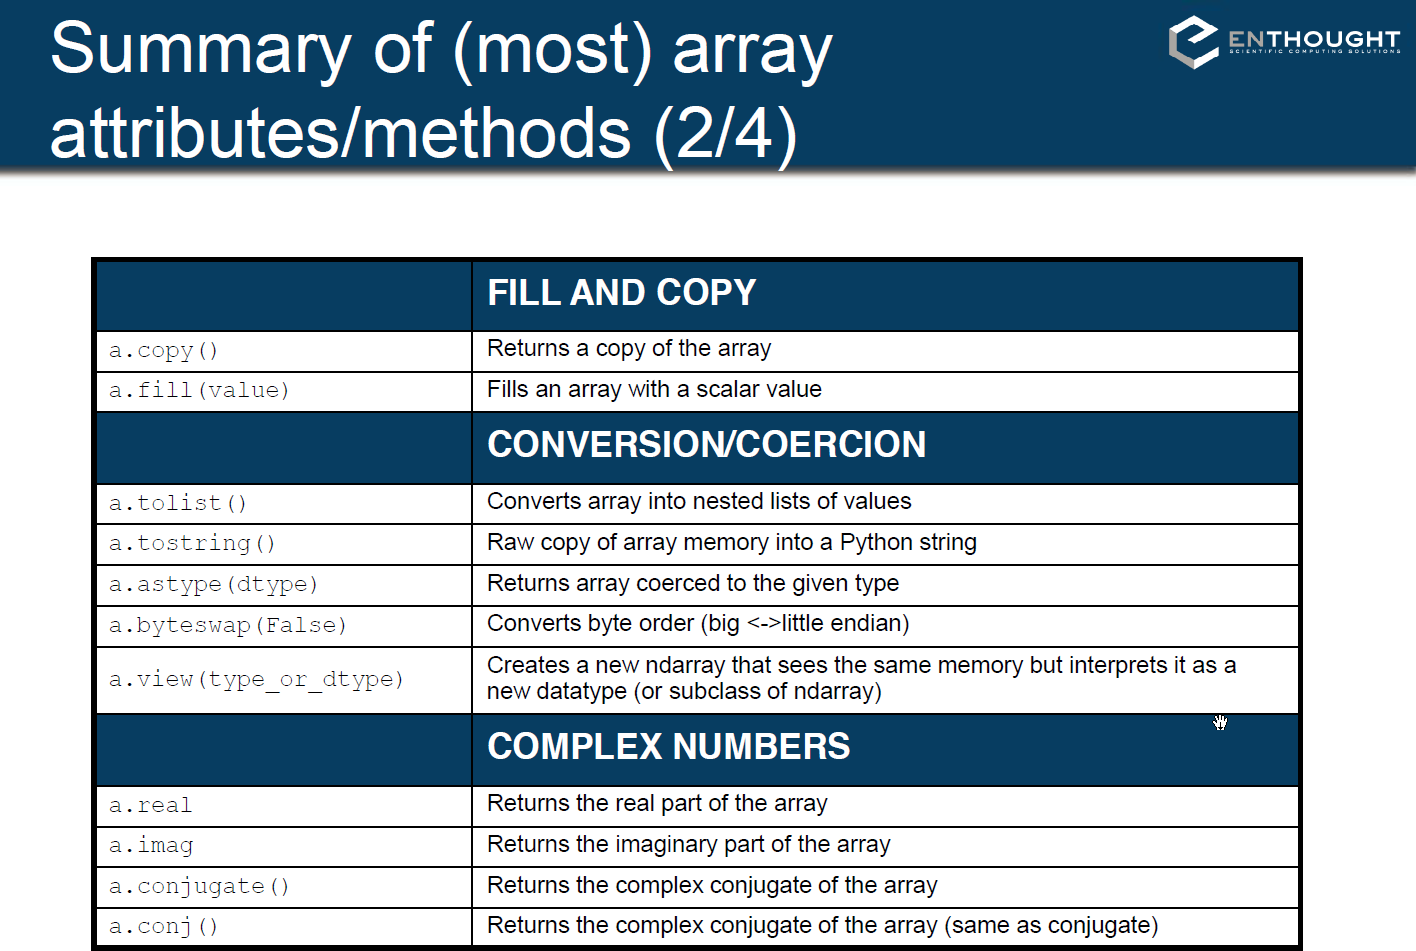

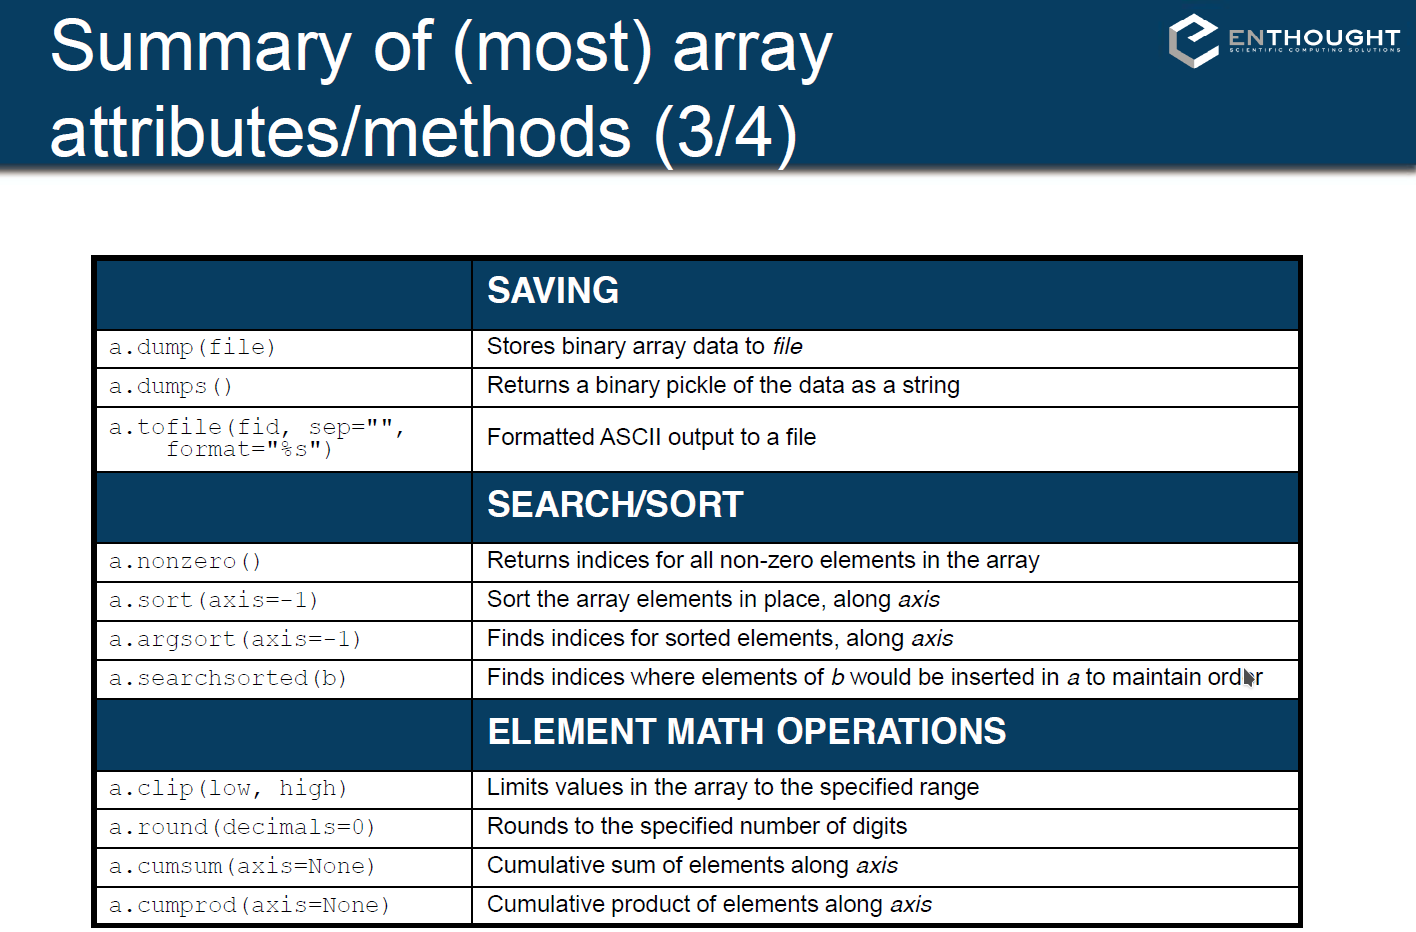

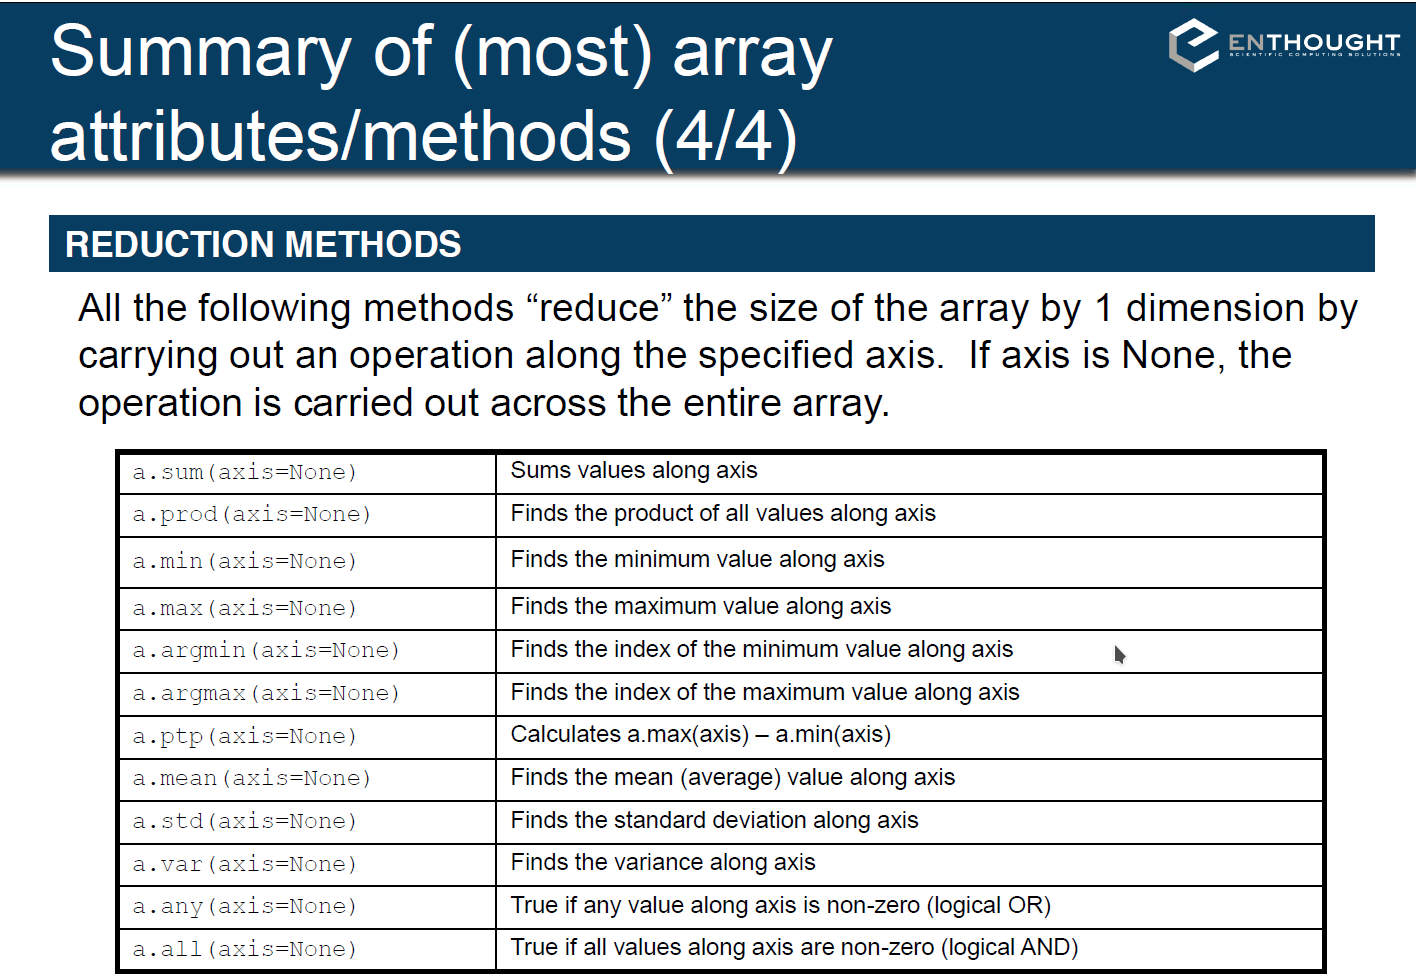

## arange, linspace, logspace

In [339]:
# np.arange es el equivalente de range en NumPy
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [340]:
np.arange(1.5, 2.0, 0.1)

array([1.5, 1.6, 1.7, 1.8, 1.9])

In [341]:
np.arange(1.5, 2.1, 0.1)

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1])

Observe el comportamiento inconsistente de arange con floats. Por esta razón es preferible usar ```np.linspace()```. Esto se debe a los errores de representación (15 dígitos) con los floats.

In [342]:
8.3-0.1

8.200000000000001

In [343]:
np.linspace(1.5, 2.0, 6)

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [344]:
np.linspace(1.5, 2.1, 7)

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1])

In [345]:
np.linspace(1.5, 2.1, 6, endpoint=False)

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [346]:
# hay un argumento, para especificar la base. 
# Por defecto se usa base=10
np.logspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

In [347]:
10**np.linspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

## ones, zeros, identity, empty, fill

Observe que el tipo de dato por defecto es el ```float64```

In [348]:
np.ones(4)

array([1., 1., 1., 1.])

In [349]:
np.ones((4,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [350]:
np.zeros(4)

array([0., 0., 0., 0.])

In [351]:
np.zeros((4,3), dtype=np.int16)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int16)

In [352]:
np.identity(4)    # es lo mismo que np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [353]:
# empty simplemente separa un bloque de memoria y no lo limpia. A 
# veces ud. verá simplemente ceros, pero no se confíe.
# Se debe ser muy cuidadoso de asignar esta memoria antes de leerla
# El comando existe por razones de velocidad.
a = np.empty(6) 
a

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [354]:
a = np.empty((6,3))
a.fill(5)
a

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [355]:
# esto funciona, pero es más lento que fill()
a[:] = 4  # equivalente a a[:,:] = 4
a

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [356]:
a = np.diag([1,2,3,4])
a

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [357]:
who

A	 A_lista	 a	 am	 atributos_del_array	 b	 c	 d	 elemento	 
f	 fila	 idx	 lista	 mask1	 mask2	 mat	 mat2	 mat3	 
mi_fun	 mifun	 np	 r	 v_mifun	 vec	 vec2	 x	 x1	 
x2	 x3	 x4	 x5	 x6	 x7	 y	 y2	 z	 



In [358]:
whos

Variable              Type         Data/Info
--------------------------------------------
A                     ndarray      3x6: 18 elems, type `float64`, 144 bytes
A_lista               list         n=3
a                     ndarray      4x4: 16 elems, type `int64`, 128 bytes
am                    int64        6
atributos_del_array   function     <function atributos_del_array at 0x7faa39ff9510>
b                     ndarray      2: 2 elems, type `float32`, 8 bytes
c                     ndarray      4: 4 elems, type `float64`, 32 bytes
d                     ndarray      4: 4 elems, type `uint8`, 4 bytes
elemento              int64        43
f                     ndarray      : 1 elems, type `<U15`, 60 bytes
fila                  ndarray      4: 4 elems, type `int64`, 32 bytes
idx                   ndarray      2: 2 elems, type `int64`, 16 bytes
lista                 list         n=25
mask1                 ndarray      8: 8 elems, type `bool`, 8 bytes
mask2                 ndarray     

Tarea: mirar las siguientes funciones ```zeros_like(), ones_like(),    empty_like(), fromfunction(), fromfile()```

## Funciones varias

NOTA: NumPy tiene el método ```np.append()```. ¡Evite usarlo!

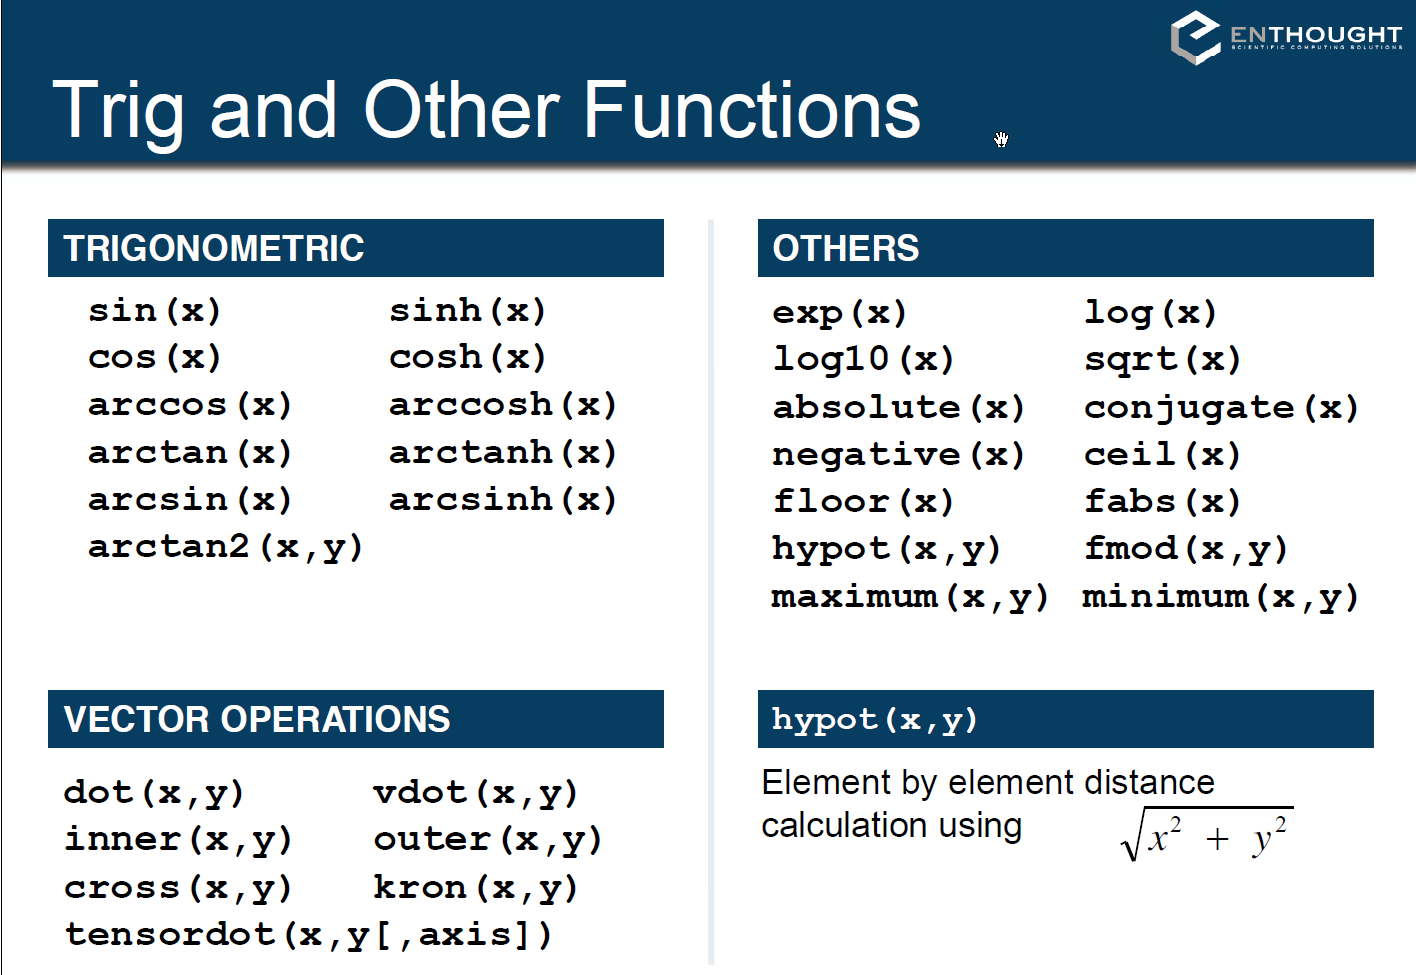

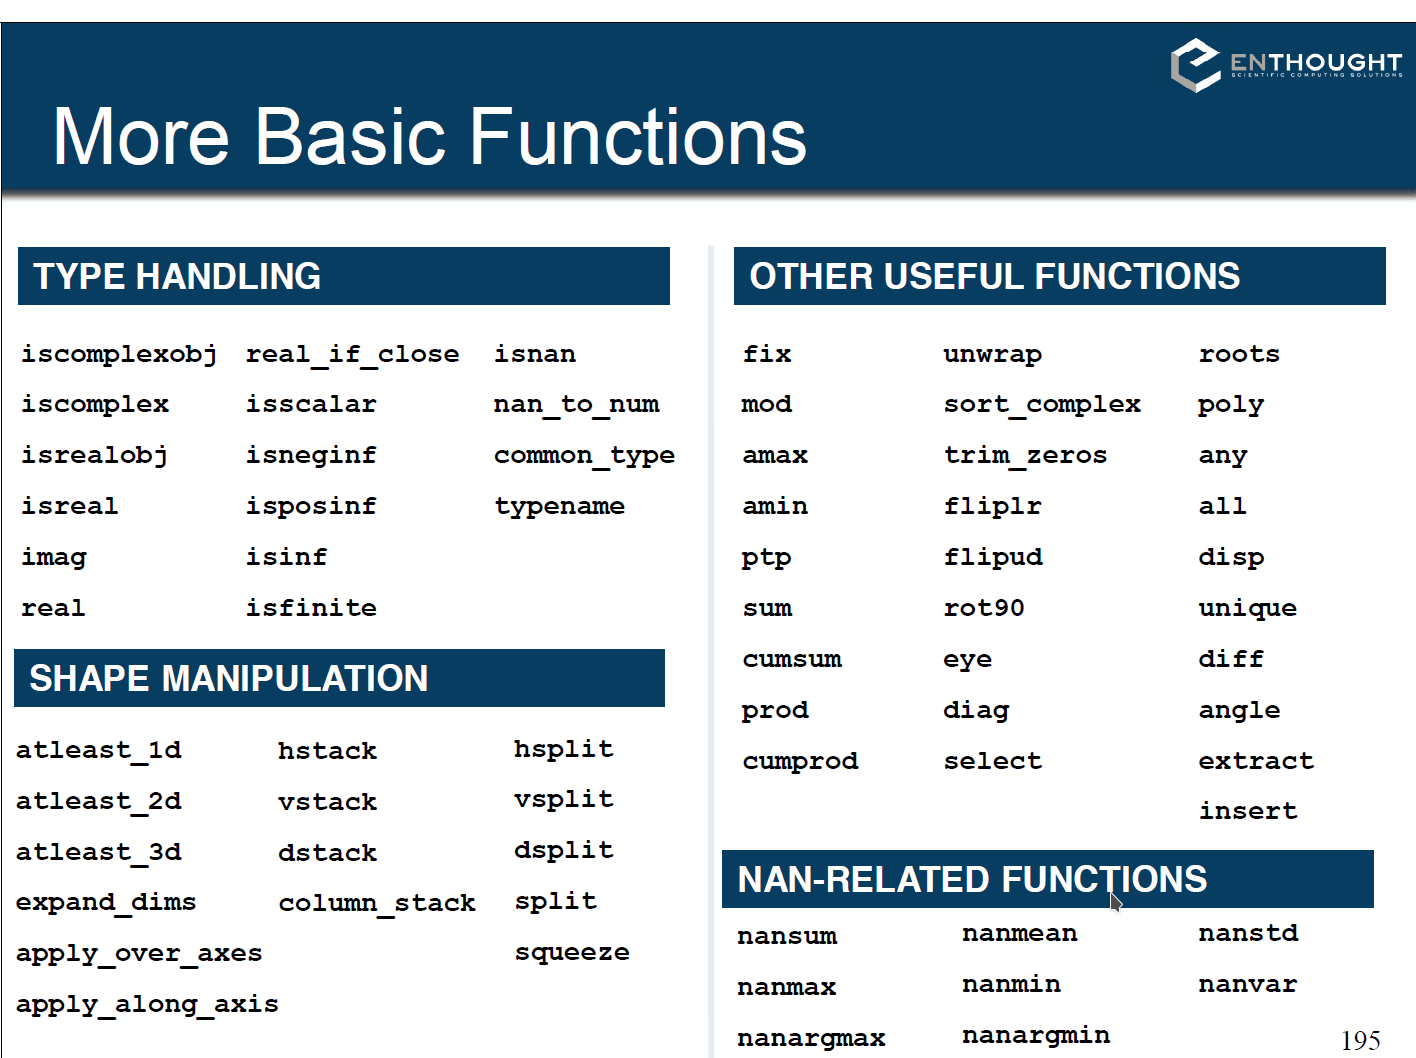

## Vectorizando funciones

In [359]:
# Creemos nuestra función especial:
def mifun(x):
    if x < 0:
        return x**2
    elif x < 10:
        return x**3
    else:
        return x**4

In [360]:
x = np.arange(-10,20,4)
x

array([-10,  -6,  -2,   2,   6,  10,  14,  18])

El siguiente comando produce un error, ya que esta función no sabe como tratar con datos vectorizados
```python
mifun(x)
```

In [361]:
# Creemos entonces una versión vectorizada
v_mifun = np.vectorize(mifun)

v_mifun(x)

array([   100,     36,      4,      8,    216,  10000,  38416, 104976])

## Concatenando arrays

In [362]:
a = np.floor(10*np.random.random((2,2))); print('a = ', a)
b = np.floor(10*np.random.random((2,2))); print('b = ', b)

a =  [[0. 6.]
 [1. 1.]]
b =  [[6. 9.]
 [6. 7.]]


In [363]:
np.vstack((a,b))

array([[0., 6.],
       [1., 1.],
       [6., 9.],
       [6., 7.]])

In [364]:
np.hstack((a,b))

array([[0., 6., 6., 9.],
       [1., 1., 6., 7.]])

## Concatenando columnas

In [365]:
a = np.array([4.,2., 1.])
b = np.array([3.,8.,-2.])

In [366]:
np.column_stack((a,b))

array([[ 4.,  3.],
       [ 2.,  8.],
       [ 1., -2.]])

In [367]:
np.row_stack((a,b))

array([[ 4.,  2.,  1.],
       [ 3.,  8., -2.]])

In [368]:
np.hstack((a,b))

array([ 4.,  2.,  1.,  3.,  8., -2.])

In [369]:
np.hstack((a[:,np.newaxis],b[:,np.newaxis]))

array([[ 4.,  3.],
       [ 2.,  8.],
       [ 1., -2.]])

In [370]:
np.vstack((a,b))


array([[ 4.,  2.,  1.],
       [ 3.,  8., -2.]])

In [371]:
np.r_[a,b]

array([ 4.,  2.,  1.,  3.,  8., -2.])

In [372]:
np.c_[a,b]

array([[ 4.,  3.],
       [ 2.,  8.],
       [ 1., -2.]])

In [373]:
np.r_[1:4,0,4]

array([1, 2, 3, 0, 4])

## Array broadcasting

En MATLAB cuando se hacen operaciones con funciones en varias dimensiones, era necesario utilizar el comando meshgrid (np.meshgrid()) o en ocasiones el comando repmat(), lo cual crea innecesariamente copias de los vectores iniciales en la memoria. Sin embargo, en numpy esto se evita utilizando una poderosa técnica llamada broadcasting, que veremos a continuación:

In [374]:
# Se quieren evitar operaciones como:

In [375]:
a = np.arange(5)
b = np.arange(3)

In [376]:
# Se quieren evitar operaciones como:
x,y = np.meshgrid(a,b)

In [377]:
x

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [378]:
y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [379]:
z = x+y
z

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

La idea es hacer un a+b, pero directamente no se puede:
El siguiente código produce un error
```python
a+b```

In [380]:
# broadcasting in action!
a[np.newaxis, :] + b[:, np.newaxis]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [381]:
print(a[np.newaxis, :].shape, b[:, np.newaxis].shape)

(1, 5) (3, 1)


In [382]:
a[:, np.newaxis] + b[np.newaxis, :]

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [383]:
print(a[:, np.newaxis].shape, b[np.newaxis, :].shape)

(5, 1) (1, 3)


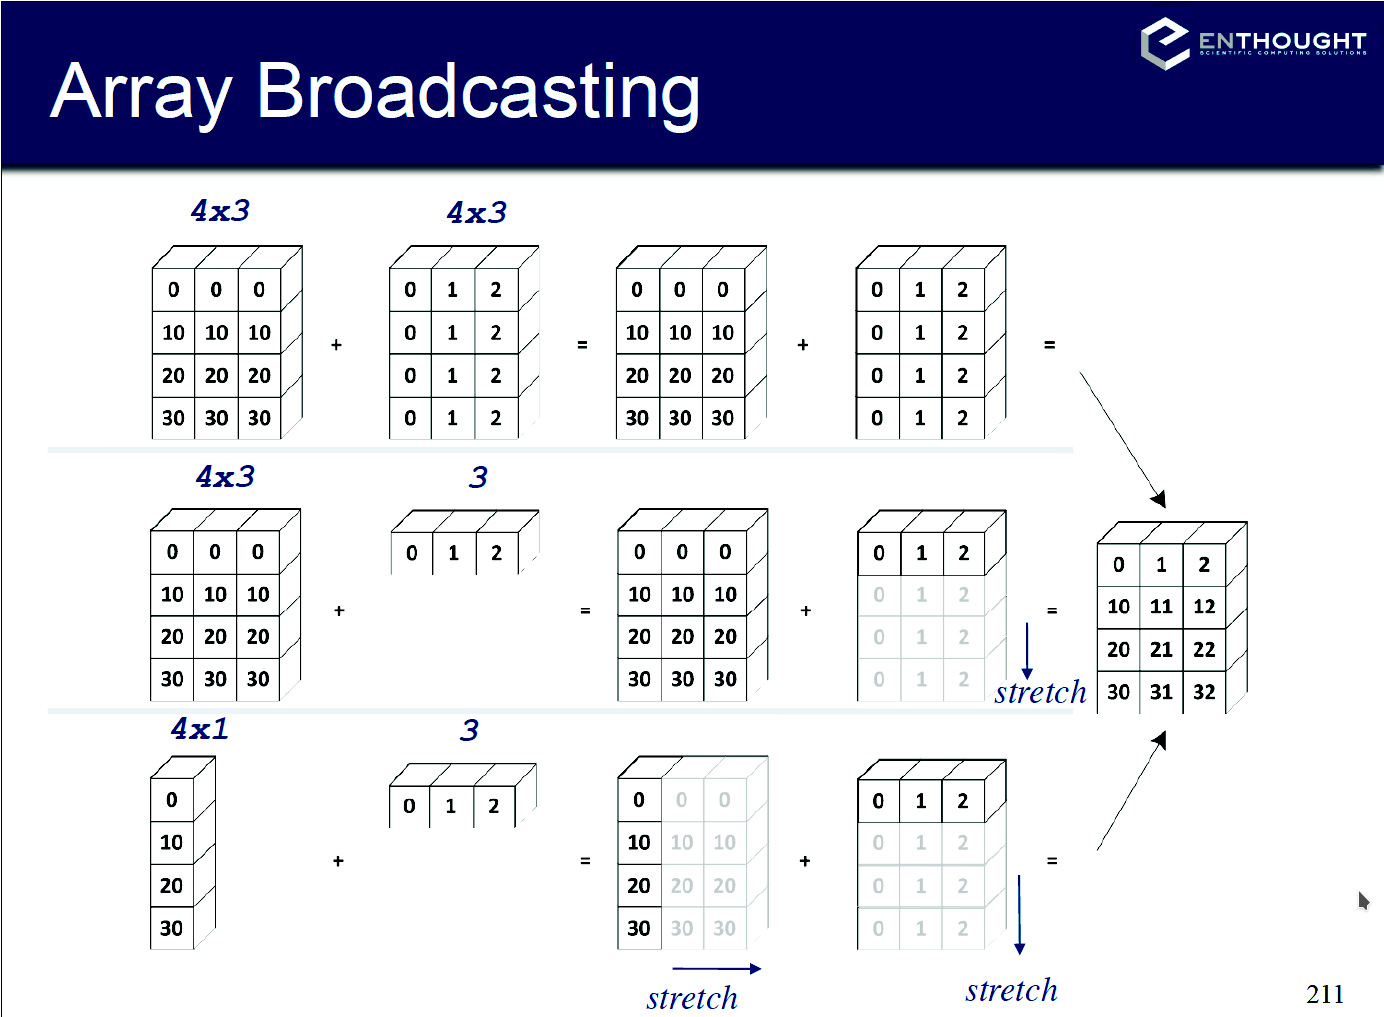

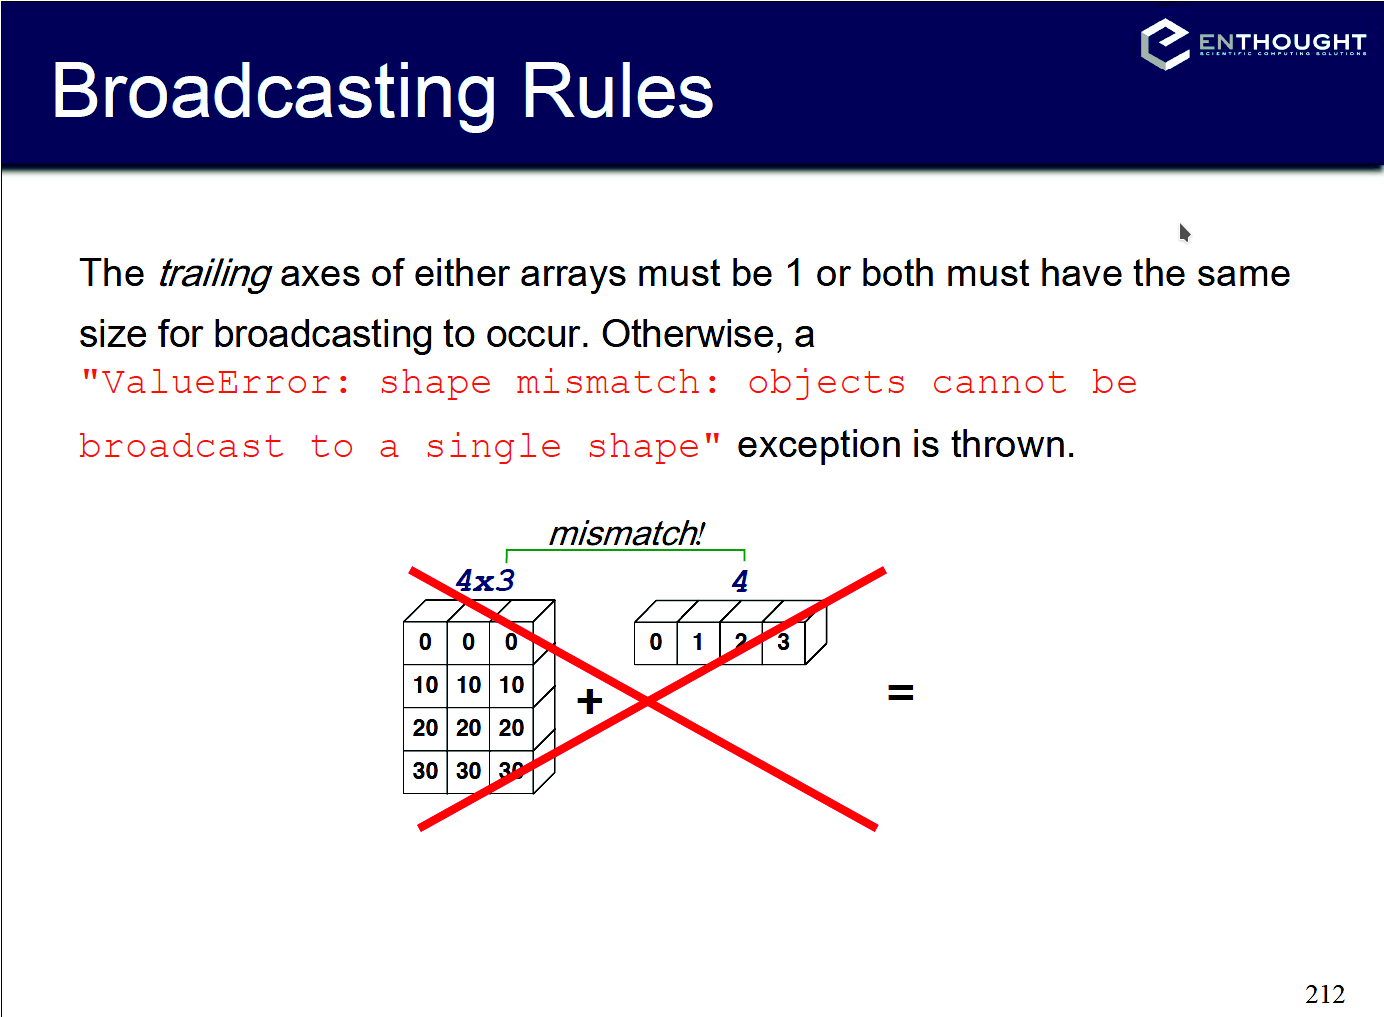

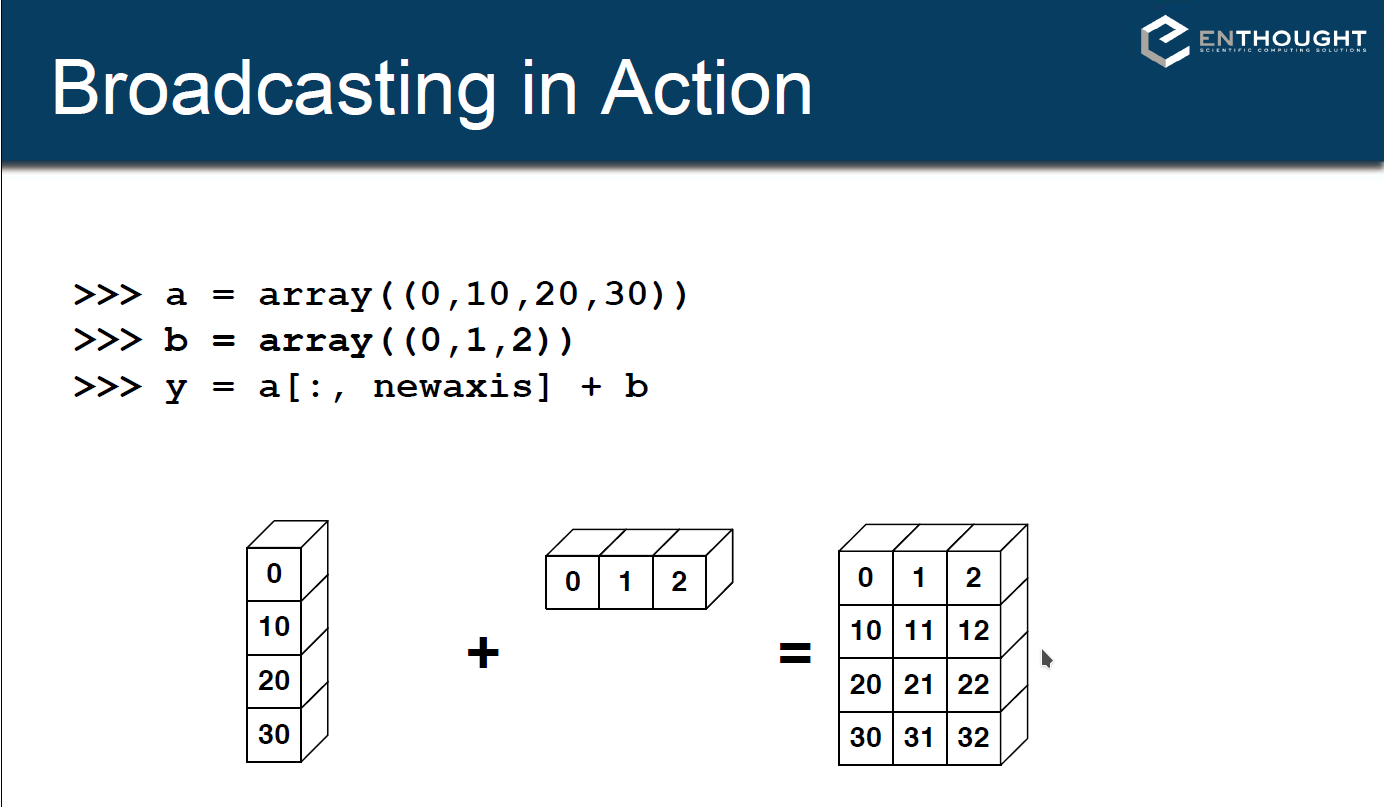

## El método ```.ix_()```

## Algebra lineal

In [384]:
dir(np.linalg)

['LinAlgError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_umath_linalg',
 'absolute_import',
 'cholesky',
 'cond',
 'det',
 'division',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'info',
 'inv',
 'lapack_lite',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'print_function',
 'qr',
 'setup',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test',
 'tests']

Existen otras funciones como:
* ```np.trace()```: calcula la traza de una matriz

## Operadores lógicos 

* np.logical_not, np.logical_and, np.logical_or se aplican con arrays booleanos
* Recuerde que 0=False y cualquier cosa diferente a cero es True

In [385]:
a = np.array([1, 3, 5, 0])
b = np.array([4, 3, 0, 0])
print('a&b', np.logical_and(a,b))
print('a|b', np.logical_or(a,b))
print('not a', np.logical_not(a))

a&b [ True  True False False]
a|b [ True  True  True False]
not a [False False False  True]


## Haciendo loops en numpy

In [386]:
a = np.empty(1000000).reshape(1000,1000)
b = np.empty(1000000).reshape(1000,1000)

def mi_fun(x):
    return x**3 + np.sqrt(x)

In [387]:
%%timeit

# Los loops en python son muy ineficientes:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i,j] = (i+1)*(j+1)*(j+2)

238 ms ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [388]:
%%timeit

for idx, valor in np.ndenumerate(a):
    b[idx] =  mi_fun(valor)

2.14 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [389]:
%%timeit

for fila in a:
    for elemento in fila:
        mi_fun(elemento)

2.49 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [390]:
%%timeit

# Utilizando el array aplanado es algo más eficiente
for elemento in a.ravel():    
    mi_fun(elemento)

2.52 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [391]:
a = np.arange(1000000)

In [392]:
%%timeit
a**2

1.3 ms ± 5.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [393]:
%%timeit
[x**2 for x in a];

420 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [394]:
%%timeit
np.sin(a)

45.1 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [395]:
%%timeit
[np.sin(x) for x in a];

2.18 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Tutoriales recomendados:
* From Python to Numpy by Nicolas P. Rougier; http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html
    
* The SciPy lectures: http://www.scipy-lectures.org/    

# FALTA:
* Hacer sección en sobre como leer, escribir archivos: .txt, .csv, .mat
* mgrid(), ogrid()
* Voy slide 30=2016, 26=2017

all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj,
corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum,
mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose,
var, vdot, vectorize, where

2.3.3 Splitting one array into several smaller ones